In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import ctd


path = Path('..', 'tests', 'data')

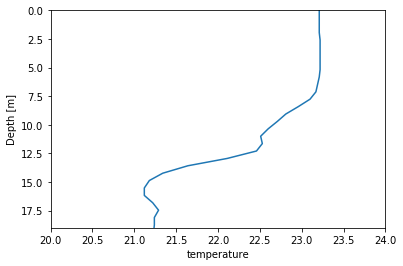

In [2]:
cast = ctd.from_edf(path.joinpath('XBT.EDF.gz'))
ax = cast['temperature'].plot_cast()
ax.axis([20, 24, 19, 0]);

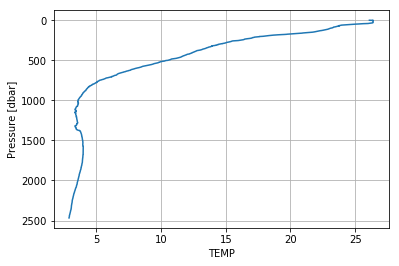

In [3]:
cast = ctd.from_fsi(path.joinpath('FSI.txt.gz'))
downcast, upcast = cast.split()
ax = downcast['TEMP'].plot_cast()
ax.grid(True)

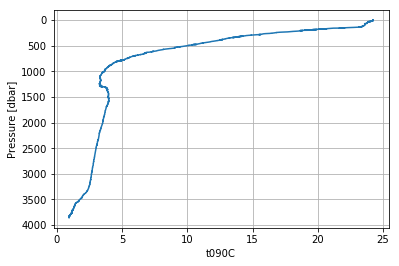

In [4]:
cast = ctd.from_cnv(path.joinpath('CTD_big.cnv.bz2'))
downcast, upcast = cast.split()
ax = downcast['t090C'].plot_cast()
ax.grid(True)

In [5]:
from ctd import rosette_summary


ros = rosette_summary(path.joinpath('CTD', 'g01l01s01.ros'))
ros = ros.groupby(ros.index).mean()

ros

,altM,bat,bpos,c0S/m,dz/dtM,wetCDOM,latitude,longitude,sbeox0Mm/Kg,sbeox1Mm/Kg,...,timeS,v0,v1,v2,v3,v4,v5,sbeox0V,flag,pressure
nbf,,,,,,,,,,,,,,,,,,,,,
1,8.478571,0.171437,1,3.424277,0.105204,4.017227,28.248180,-89.256480,168.191714,142.890857,...,1579.458327,1.664078,1.578265,0.424000,4.472133,0.056218,0.232686,1.664078,False,835.662429
2,66.331224,0.081443,2,3.451780,-0.080184,4.033410,28.248029,-89.257220,159.894163,135.617918,...,1774.625000,1.620106,1.536220,3.316561,4.573853,0.051178,0.233322,1.620106,False,806.290082
3,98.710408,0.057733,3,3.507171,-0.128571,3.888237,28.247920,-89.258180,145.460980,123.346531,...,1991.500000,1.549616,1.471447,4.935324,4.601027,0.052941,0.227516,1.549616,False,705.723367
4,98.725510,0.052141,4,3.608956,0.024898,3.891386,28.247880,-89.259296,129.973571,110.019102,...,2231.375000,1.476616,1.403033,4.936231,4.607461,0.050094,0.227639,1.476616,False,604.714939
5,98.730000,0.051008,5,3.697932,-0.027122,3.735594,28.248020,-89.260240,122.336388,103.630857,...,2443.250000,1.452165,1.381265,4.936500,4.608810,0.049329,0.221429,1.452165,False,503.967776
6,98.719388,0.051835,6,3.856994,0.094367,3.734400,28.248205,-89.261400,121.758939,103.323898,...,2683.250000,1.495259,1.422049,4.935863,4.607824,0.043996,0.221367,1.495259,False,404.474163
7,98.689184,0.052108,7,4.116017,0.204959,3.554333,28.248220,-89.262620,128.523776,109.458286,...,2940.791673,1.622308,1.541096,4.934467,4.607498,0.037233,0.214171,1.622308,False,303.768020
8,98.634898,0.050173,8,4.470728,-0.023490,3.386757,28.248180,-89.263730,149.198265,127.546388,...,3162.750000,1.908180,1.805661,4.931796,4.609765,0.028345,0.207449,1.908180,False,201.675061
9,98.631837,0.052755,9,4.613940,-0.023694,3.276531,28.248140,-89.264458,147.471286,126.537571,...,3303.625000,1.935986,1.834457,4.931673,4.606733,0.023469,0.203067,1.935986,False,151.205347


In [6]:
bottles = ctd.from_btl(path.joinpath('btl', 'bottletest.btl'))

bottles.head()

,Bottle,Date,DepSM,PrDM,T090C,T190C,C0S/m,C1S/m,Sal00,Sal11,...,Sigma-�11,FlECO-AFL,CStarTr0,CStarAt0,Sbeox0Mm/Kg,Par,Spar,Cpar,Scan,Statistic
0,1,2013-06-27 21:23:18,31.638,31.875,9.1594,9.1600,3.627258,3.626589,33.9171,33.9096,...,26.2393,0.1277,11.6390,8.6035,118.458,0.441550,1860.800,0.023731,18147,avg
1,1,2013-06-27 21:23:18,0.206,0.208,0.0253,0.0265,0.002050,0.002150,0.0027,0.0031,...,0.0066,0.0224,0.1272,0.0437,1.770,0.002367,16.188,0.000266,14,sdev
2,1,2013-06-27 21:23:18,31.320,31.555,9.1330,9.1326,3.625157,3.624497,33.9130,33.9024,...,26.2277,0.1025,11.3524,8.5231,115.722,0.432660,1812.700,0.023224,18123,min
3,1,2013-06-27 21:23:18,31.982,32.222,9.2073,9.2061,3.631310,3.630471,33.9206,33.9139,...,26.2471,0.1538,11.8746,8.7030,121.180,0.444400,1871.400,0.024516,18171,max
4,2,2013-06-27 21:23:20,31.162,31.396,9.2179,9.2178,3.632233,3.631494,33.9134,33.9058,...,26.2271,0.1589,11.3333,8.7104,115.429,0.429650,1859.100,0.023113,18186,avg
